In [1]:
# Workshop Setup
import sys
sys.path.insert(0, '..')

from setup_llm import verify_setup, get_chat_model

verify_setup()

print("\n📚 Session 2, Module 4: Multi-Agent Collaboration")
print("=" * 60)
print("\nThis module covers:")
print("\nPart 1: Multi-Agent Architecture Patterns (15 min)")
print("  • Beyond single agents - why collaborate?")
print("  • Supervisor vs peer patterns")
print("  • When to use which pattern")
print("\nPart 2: Peer Review Pattern (15 min)")
print("  • Proposer ↔ Reviewer agents")
print("  • Structured feedback exchange")
print("  • Consensus building")
print("\nPart 3: Send API for Dynamic Parallelism (15 min)")
print("  • Fan-out/fan-in patterns")
print("  • Map-reduce with agents")
print("  • Parallel research demo")
print("\n🎯 Build agents that collaborate and work in parallel!")
print("\n⚠️  Prerequisites: Module 3 (Self-Reflection)")

🔍 Checking LLM Configuration...
📡 Provider: DIAL (Azure OpenAI via EPAM AI Proxy)
✅ DIAL_API_KEY is set

📋 Configuration:
   AZURE_OPENAI_ENDPOINT: https://ai-proxy.lab.epam.com
   AZURE_OPENAI_API_VERSION: 2024-08-01-preview
   AZURE_OPENAI_DEPLOYMENT_NAME: gpt-4

✅ DIAL setup verified successfully!

📚 Session 2, Module 4: Multi-Agent Collaboration

This module covers:

Part 1: Multi-Agent Architecture Patterns (15 min)
  • Beyond single agents - why collaborate?
  • Supervisor vs peer patterns
  • When to use which pattern

Part 2: Peer Review Pattern (15 min)
  • Proposer ↔ Reviewer agents
  • Structured feedback exchange
  • Consensus building

Part 3: Send API for Dynamic Parallelism (15 min)
  • Fan-out/fan-in patterns
  • Map-reduce with agents
  • Parallel research demo

🎯 Build agents that collaborate and work in parallel!

⚠️  Prerequisites: Module 3 (Self-Reflection)


---

## Part 1: Multi-Agent Architecture Patterns

### Why Multi-Agent Collaboration?

**Single Agent Limitations:**
- One perspective = blind spots
- Context window fills up fast
- No "peer review" for quality
- Complex tasks overwhelm single agent

**Collaborative Pattern Benefits:**
- Multiple perspectives catch errors
- Specialized agents for specific tasks
- Peer review improves quality
- Negotiation resolves conflicts

### Pattern Comparison

```
┌─────────────────────────────────────────────────────────────────────────┐
│                    MULTI-AGENT PATTERNS                                 │
├─────────────────────────────────────────────────────────────────────────┤
│                                                                         │
│  1. SUPERVISOR PATTERN              2. PEER REVIEW PATTERN              │
│  ┌──────────────┐                   ┌───────┐   ┌───────┐               │
│  │  Supervisor  │                   │Agent A│◄──│Agent B│               │
│  └──────┬───────┘                   └───┬───┘   └───┬───┘               │
│         │                               │           │                   │
│    ┌────┴────┐                          └─────┬─────┘                   │
│    ▼         ▼                                ▼                         │
│ ┌──────┐ ┌──────┐                      ┌───────────┐                    │
│ │WorkerA│ │WorkerB│                    │ Consensus │                    │
│ └──────┘ └──────┘                      └───────────┘                    │
│                                                                         │
│  (Covered in Session 1!)            (New in this module)                │
│                                                                         │
│  3. SEND API (Fan-Out)              4. DEBATE PATTERN                   │
│  ┌───────────┐                      ┌───────┐ ◄──► ┌───────┐            │
│  │Orchestrator│                     │  Pro  │      │  Con  │            │
│  └─────┬─────┘                      └───┬───┘      └───┬───┘            │
│        │ spawn N workers                │              │                │
│   ┌────┼────┐                           └──────┬───────┘                │
│   ▼    ▼    ▼                                  ▼                        │
│  [W1] [W2] [W3]                          ┌───────────┐                  │
│   │    │    │                            │   Judge   │                  │
│   └────┼────┘                            └───────────┘                  │
│        ▼                                                                │
│   [Synthesizer]                                                         │
│                                                                         │
└─────────────────────────────────────────────────────────────────────────┘
```

### Pattern Selection Guide

| Pattern | When to Use | Control Flow | Example |
|---------|-------------|--------------|--------|
| **Supervisor** | Clear domain separation | Centralized | Calendar + Email assistant |
| **Peer Review** | Quality assurance | Sequential loops | Code review, design review |
| **Send API** | Unknown # of parallel tasks | Fan-out/fan-in | Research multiple topics |
| **Debate** | Exploring trade-offs | Parallel → Judge | Pro/con analysis |

### Session 1 Recap: Supervisor Pattern

We built a supervisor pattern in Session 1:

```python
# Session 1 - Supervisor delegates to specialized workers
class SupervisorState(TypedDict):
    messages: Annotated[list, add_messages]
    next: str  # Which worker to call next

# Supervisor decides who handles each task
def supervisor(state):
    # "calendar" for scheduling, "email" for messages
    return {"next": "calendar"}
```

**This module extends with:**
- Peer review (agents critique each other)
- Send API (dynamic parallel workers)
- Consensus building (agents must agree)

---

## Part 2: Peer Review Pattern

### The Peer Review Architecture

Unlike supervisor (one boss, many workers), peer review has **equal agents** that critique each other:

```
┌─────────────────────────────────────────────────────────┐
│               PEER REVIEW LOOP                          │
├─────────────────────────────────────────────────────────┤
│                                                         │
│    Request                                              │
│        │                                                │
│        ▼                                                │
│   ┌───────────┐                                         │
│   │ Proposer  │ ← Creates initial proposal              │
│   └─────┬─────┘                                         │
│         │                                               │
│         ▼                                               │
│   ┌───────────┐                                         │
│   │ Reviewer  │ ← Critiques proposal                    │
│   └─────┬─────┘                                         │
│         │                                               │
│         ▼                                               │
│   ┌───────────┐                                         │
│   │ Consensus │                                         │
│   │   Check   │                                         │
│   └─────┬─────┘                                         │
│         │                                               │
│    ┌────┴────┐                                          │
│    ▼         ▼                                          │
│ [Approved] [Needs Work]                                 │
│    │           │                                        │
│    │      ┌────▼────┐                                   │
│    │      │Proposer │ ← Addresses feedback              │
│    │      │Response │                                   │
│    │      └────┬────┘                                   │
│    │           └──────→ Back to Reviewer                │
│    ▼                                                    │
│  Output                                                 │
└─────────────────────────────────────────────────────────┘
```

### Key Design Elements

1. **Distinct Personas**: Each agent has different expertise/perspective
2. **Structured Exchange**: Pydantic models for consistent feedback
3. **Conversation History**: Track exchanges for context
4. **Consensus Detection**: Clear criteria for approval
5. **Escalation Path**: Fallback when agents can't agree

In [2]:
from typing import TypedDict, Annotated, Literal, List
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, SystemMessage
import operator

# ═══════════════════════════════════════════════════════════════════════════
# STATE & MODELS FOR PEER REVIEW
# ═══════════════════════════════════════════════════════════════════════════

class PeerReviewState(TypedDict):
    """State for peer review workflow."""
    
    # Input
    task: str
    
    # Proposal tracking
    current_proposal: str
    
    # Review exchange
    conversation: Annotated[List[dict], operator.add]
    
    # Control
    round: int
    max_rounds: int
    
    # Outcome
    decision: str  # approved, needs_revision, escalate


class ReviewFeedback(BaseModel):
    """Structured review feedback."""
    
    issues: List[str] = Field(
        description="Specific issues found (1-3)",
        min_length=0, max_length=3
    )
    suggestions: List[str] = Field(
        description="Improvement suggestions (1-3)",
        min_length=0, max_length=3
    )
    approval_ready: bool = Field(
        description="True if proposal is ready for approval"
    )


print("✅ State and models defined")
print("\nPeerReviewState tracks:")
print("  • task: What we're reviewing")
print("  • current_proposal: Latest version")
print("  • conversation: Exchange history (with reducer)")
print("  • round/max_rounds: Control iteration")

✅ State and models defined

PeerReviewState tracks:
  • task: What we're reviewing
  • current_proposal: Latest version
  • conversation: Exchange history (with reducer)
  • round/max_rounds: Control iteration


In [3]:
# ═══════════════════════════════════════════════════════════════════════════
# PROPOSER AGENT
# ═══════════════════════════════════════════════════════════════════════════

def proposer(state: PeerReviewState) -> dict:
    """Proposer agent: Creates or revises proposals."""
    
    model = get_chat_model()
    round_num = state.get("round", 0) + 1
    
    print(f"\n{'='*60}")
    print(f"👷 PROPOSER AGENT - Round {round_num}")
    print(f"{'='*60}")
    
    # Check if this is initial proposal or revision
    if state.get("current_proposal"):
        # Get latest review feedback
        reviews = [c for c in state.get("conversation", []) if c["role"] == "reviewer"]
        latest_review = reviews[-1] if reviews else {}
        
        prompt = f"""You are revising your proposal based on peer feedback.

TASK: {state['task']}

YOUR CURRENT PROPOSAL:
{state['current_proposal']}

REVIEWER FEEDBACK:
Issues: {latest_review.get('issues', [])}
Suggestions: {latest_review.get('suggestions', [])}

Write an IMPROVED proposal addressing the feedback."""
        print("   Mode: REVISION")
    else:
        prompt = f"""You are creating an initial proposal.

TASK: {state['task']}

Create a clear, well-reasoned proposal."""
        print("   Mode: INITIAL PROPOSAL")
    
    response = model.invoke([HumanMessage(content=prompt)])
    proposal = response.content.strip()
    
    print(f"   Generated proposal ({len(proposal)} chars)")
    
    entry = {
        "role": "proposer",
        "round": round_num,
        "content": proposal[:200] + "..."  # Summary for history
    }
    
    return {
        "current_proposal": proposal,
        "conversation": [entry],
        "round": round_num
    }

print("✅ proposer agent defined")

✅ proposer agent defined


In [4]:
# ═══════════════════════════════════════════════════════════════════════════
# REVIEWER AGENT
# ═══════════════════════════════════════════════════════════════════════════

def reviewer(state: PeerReviewState) -> dict:
    """Reviewer agent: Critiques proposals with structured feedback."""
    
    model = get_chat_model()
    critic = model.with_structured_output(ReviewFeedback)
    
    print(f"\n{'='*60}")
    print(f"🔍 REVIEWER AGENT - Round {state['round']}")
    print(f"{'='*60}")
    
    prompt = f"""You are a thorough peer reviewer.

TASK: {state['task']}

PROPOSAL TO REVIEW:
{state['current_proposal']}

Review critically but constructively:
- List specific issues (if any)
- Suggest improvements (if needed)
- Set approval_ready=True ONLY if ready for production"""
    
    feedback = critic.invoke([HumanMessage(content=prompt)])
    
    print(f"\n   Approval Ready: {'✅ Yes' if feedback.approval_ready else '❌ No'}")
    if feedback.issues:
        print(f"   Issues: {len(feedback.issues)}")
        for issue in feedback.issues:
            print(f"      ⚠️  {issue}")
    if feedback.suggestions:
        print(f"   Suggestions: {len(feedback.suggestions)}")
    
    entry = {
        "role": "reviewer",
        "round": state["round"],
        "issues": feedback.issues,
        "suggestions": feedback.suggestions,
        "approval_ready": feedback.approval_ready
    }
    
    return {
        "conversation": [entry]
    }

print("✅ reviewer agent defined")

✅ reviewer agent defined


In [5]:
# ═══════════════════════════════════════════════════════════════════════════
# CONSENSUS CHECK & FINALIZATION
# ═══════════════════════════════════════════════════════════════════════════

def check_consensus(state: PeerReviewState) -> Literal["revise", "approved", "escalate"]:
    """Check if consensus reached."""
    
    print(f"\n{'='*60}")
    print(f"🤝 CONSENSUS CHECK")
    print(f"{'='*60}")
    print(f"   Round: {state['round']}/{state['max_rounds']}")
    
    # Check latest review
    reviews = [c for c in state.get("conversation", []) if c["role"] == "reviewer"]
    if reviews:
        latest = reviews[-1]
        if latest.get("approval_ready", False):
            print(f"   ✅ Reviewer approved!")
            return "approved"
    
    # Check max rounds
    if state["round"] >= state["max_rounds"]:
        print(f"   ⚠️  Max rounds reached - escalating")
        return "escalate"
    
    print(f"   🔄 Not approved yet - continuing")
    return "revise"


def finalize_approved(state: PeerReviewState) -> dict:
    """Finalize with approval."""
    print(f"\n✅ APPROVED after {state['round']} rounds")
    return {"decision": "approved"}


def finalize_escalate(state: PeerReviewState) -> dict:
    """Escalate to human."""
    print(f"\n⚠️  ESCALATED - needs human decision")
    return {"decision": "escalate"}

print("✅ Consensus and finalization functions defined")

✅ Consensus and finalization functions defined


In [6]:
# ═══════════════════════════════════════════════════════════════════════════
# BUILD PEER REVIEW GRAPH
# ═══════════════════════════════════════════════════════════════════════════

builder = StateGraph(PeerReviewState)

# Add nodes
builder.add_node("proposer", proposer)
builder.add_node("reviewer", reviewer)
builder.add_node("approved", finalize_approved)
builder.add_node("escalate", finalize_escalate)

# Add edges
builder.add_edge(START, "proposer")
builder.add_edge("proposer", "reviewer")

# Consensus check after review
builder.add_conditional_edges(
    "reviewer",
    check_consensus,
    {
        "revise": "proposer",   # Loop back for revision
        "approved": "approved",  # Consensus reached
        "escalate": "escalate"   # Needs human
    }
)

builder.add_edge("approved", END)
builder.add_edge("escalate", END)

# Compile
peer_review_graph = builder.compile()

print("✅ Peer Review Graph Compiled!")
print("""
Flow:
    START → proposer → reviewer → consensus?
                ↑          │
                └──────────┤ (revise)
                           │
                    approved / escalate → END
""")

✅ Peer Review Graph Compiled!

Flow:
    START → proposer → reviewer → consensus?
                ↑          │
                └──────────┤ (revise)
                           │
                    approved / escalate → END



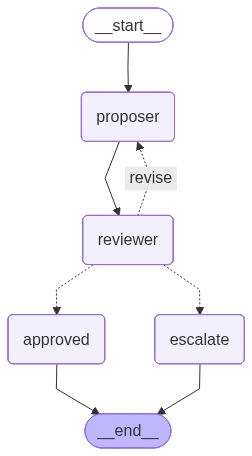

In [7]:
# Visualize
from IPython.display import Image, display

try:
    display(Image(peer_review_graph.get_graph().draw_mermaid_png()))
except Exception:
    print(peer_review_graph.get_graph().draw_mermaid())

In [8]:
# ═══════════════════════════════════════════════════════════════════════════
# RUN PEER REVIEW
# ═══════════════════════════════════════════════════════════════════════════

print("🚀 Running Peer Review Workflow")
print("=" * 60)

result = peer_review_graph.invoke({
    "task": "Write a brief error handling policy for a Python API service (3-4 bullet points)",
    "current_proposal": "",
    "conversation": [],
    "round": 0,
    "max_rounds": 3,
    "decision": ""
})

print("\n" + "=" * 60)
print(f"🎯 PEER REVIEW COMPLETE")
print(f"   Decision: {result['decision'].upper()}")
print(f"   Rounds: {result['round']}")
print("=" * 60)

print("\n📋 Final Proposal:")
print(result['current_proposal'][:500])

🚀 Running Peer Review Workflow

👷 PROPOSER AGENT - Round 1
   Mode: INITIAL PROPOSAL
   Generated proposal (1401 chars)

🔍 REVIEWER AGENT - Round 1

   Approval Ready: ❌ No
   Issues: 3
      ⚠️  The policy does not specify how to handle rate-limiting errors.
      ⚠️  No mention of internationalization/localization for error messages.
      ⚠️  Lacks details on how to handle deprecated API endpoints.
   Suggestions: 3

🤝 CONSENSUS CHECK
   Round: 1/3
   🔄 Not approved yet - continuing

👷 PROPOSER AGENT - Round 2
   Mode: REVISION
   Generated proposal (2834 chars)

🔍 REVIEWER AGENT - Round 2

   Approval Ready: ❌ No
   Issues: 2
      ⚠️  The policy could benefit from a clearer distinction between client and server responsibilities.
      ⚠️  The internationalization/localization feature might require additional details on supported languages and fallback mechanisms.
   Suggestions: 2

🤝 CONSENSUS CHECK
   Round: 2/3
   🔄 Not approved yet - continuing

👷 PROPOSER AGENT - Round 3
   Mo

---

## Part 3: Send API for Dynamic Parallelism

### What is the Send API?

The **Send API** enables **map-reduce** patterns where:
- Number of parallel tasks is **unknown ahead of time**
- Each task gets **different input state**
- Results **aggregate back** to main state

### Send API Architecture

```
┌─────────────────────────────────────────────────────────┐
│               SEND API FLOW                             │
├─────────────────────────────────────────────────────────┤
│                                                         │
│    Request: "Research 3 topics"                         │
│                    │                                    │
│                    ▼                                    │
│           ┌───────────────┐                             │
│           │  Orchestrator │  Breaks into subtasks       │
│           └───────┬───────┘                             │
│                   │                                     │
│          Return [ Send("worker", {"topic": "A"}),       │
│                   Send("worker", {"topic": "B"}),       │
│                   Send("worker", {"topic": "C"}) ]      │
│                   │                                     │
│     ┌─────────────┼─────────────┐                       │
│     │             │             │                       │
│     ▼             ▼             ▼                       │
│  ┌──────┐    ┌──────┐    ┌──────┐                       │
│  │Worker│    │Worker│    │Worker│  PARALLEL             │
│  │  A   │    │  B   │    │  C   │  EXECUTION            │
│  └──┬───┘    └──┬───┘    └──┬───┘                       │
│     │           │           │                           │
│     └───────────┴───────────┘                           │
│                 │ Reducer aggregates                    │
│                 ▼                                       │
│           ┌───────────────┐                             │
│           │  Synthesizer  │  Combines results           │
│           └───────────────┘                             │
│                 │                                       │
│                 ▼                                       │
│           Final Report                                  │
└─────────────────────────────────────────────────────────┘
```

### Key Concepts

| Concept | Description |
|---------|--------------|
| `Send(node, state)` | Creates dynamic edge to spawn worker |
| `List[Send]` | Return from conditional edge to spawn multiple |
| **Reducer** | `Annotated[list, operator.add]` collects outputs |
| **State Isolation** | Each worker has isolated state |

In [ ]:
from langgraph.types import Send

# ═══════════════════════════════════════════════════════════════════════════
# STATE SCHEMAS FOR SEND API
# ═══════════════════════════════════════════════════════════════════════════

class ResearchState(TypedDict):
    """Main orchestrator state."""
    topic: str                                           # Main topic
    subtopics: List[str]                                 # Generated subtopics
    results: Annotated[List[dict], operator.add]         # Reducer collects worker outputs
    final_report: str                                    # Combined report


class WorkerState(TypedDict):
    """Isolated state for each worker."""
    subtopic: str                                        # Single subtopic
    results: Annotated[List[dict], operator.add]         # Worker's output


print("✅ State schemas defined")
print("\nKey insight:")
print("  • ResearchState: Main state with 'results' reducer")
print("  • WorkerState: Isolated per-worker state")
print("  • operator.add: Automatically aggregates worker outputs")

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# NODE FUNCTIONS
# ═══════════════════════════════════════════════════════════════════════════

class SubtopicList(BaseModel):
    """Structured output for orchestrator."""
    subtopics: List[str] = Field(
        description="3 specific subtopics to research",
        min_length=2, max_length=4
    )


def orchestrator(state: ResearchState) -> dict:
    """Break main topic into subtopics."""
    
    model = get_chat_model()
    planner = model.with_structured_output(SubtopicList)
    
    print(f"\n{'='*60}")
    print(f"📋 ORCHESTRATOR - Planning Research")
    print(f"{'='*60}")
    
    result = planner.invoke([
        HumanMessage(content=f"Break this topic into 3 specific subtopics for parallel research: {state['topic']}")
    ])
    
    print(f"   Breaking '{state['topic']}' into {len(result.subtopics)} subtopics:")
    for i, sub in enumerate(result.subtopics, 1):
        print(f"   {i}. {sub}")
    
    return {"subtopics": result.subtopics}


def research_worker(state: WorkerState) -> dict:
    """Research a single subtopic (runs in parallel)."""
    
    model = get_chat_model()
    
    response = model.invoke([
        HumanMessage(content=f"Provide 2-3 key points about: {state['subtopic']}")
    ])
    
    print(f"   🔍 Worker completed: {state['subtopic'][:40]}...")
    
    return {
        "results": [{
            "subtopic": state["subtopic"],
            "findings": response.content
        }]
    }


def synthesizer(state: ResearchState) -> dict:
    """Combine all research results."""
    
    model = get_chat_model()
    
    print(f"\n{'='*60}")
    print(f"📝 SYNTHESIZER - Combining Results")
    print(f"{'='*60}")
    
    # Format findings
    all_findings = ""
    for r in state["results"]:
        all_findings += f"\n## {r['subtopic']}\n{r['findings']}\n"
    
    response = model.invoke([
        HumanMessage(content=f"""Create a brief summary report from these findings on '{state['topic']}':

{all_findings}

Provide a cohesive 2-3 paragraph summary.""")
    ])
    
    print(f"   Combined {len(state['results'])} research results")
    
    return {"final_report": response.content}

print("✅ Node functions defined")

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# THE MAGIC: SPAWN WORKERS WITH SEND API
# ═══════════════════════════════════════════════════════════════════════════

def spawn_workers(state: ResearchState) -> List[Send]:
    """
    Uses Send API to spawn parallel workers.
    
    This is the key pattern:
    - Returns List[Send]
    - Each Send creates a worker with isolated state
    - All workers run IN PARALLEL
    """
    print(f"\n⚡ Send API: Spawning {len(state['subtopics'])} parallel workers...")
    
    return [
        Send(
            "research_worker",        # Target node
            {"subtopic": subtopic}    # Isolated state for this worker
        )
        for subtopic in state["subtopics"]
    ]

print("✅ spawn_workers function defined")
print("\nPattern:")
print("  return [Send('worker', {'data': x}) for x in items]")

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# BUILD SEND API GRAPH
# ═══════════════════════════════════════════════════════════════════════════

research_builder = StateGraph(ResearchState)

# Add nodes
research_builder.add_node("orchestrator", orchestrator)
research_builder.add_node("research_worker", research_worker)
research_builder.add_node("synthesizer", synthesizer)

# Add edges
research_builder.add_edge(START, "orchestrator")

# KEY: Conditional edge with Send API
research_builder.add_conditional_edges(
    "orchestrator",
    spawn_workers,               # Returns List[Send]
    ["research_worker"]          # Possible targets
)

# All workers feed into synthesizer
research_builder.add_edge("research_worker", "synthesizer")
research_builder.add_edge("synthesizer", END)

# Compile
research_graph = research_builder.compile()

print("✅ Research Graph with Send API compiled!")
print("""
Flow:
    orchestrator
         │
    spawn_workers() → [Send, Send, Send]
         │
    ┌────┼────┐
    ▼    ▼    ▼
   W1   W2   W3   ← PARALLEL
    │    │    │
    └────┼────┘
         ▼ (reducer collects)
    synthesizer
         │
        END
""")

In [ ]:
# Visualize
try:
    display(Image(research_graph.get_graph().draw_mermaid_png()))
except Exception:
    print(research_graph.get_graph().draw_mermaid())

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════
# RUN PARALLEL RESEARCH
# ═══════════════════════════════════════════════════════════════════════════

print("🚀 Running Parallel Research with Send API")
print("=" * 60)

result = research_graph.invoke({
    "topic": "Key Benefits of LangGraph for Production AI",
    "subtopics": [],
    "results": [],
    "final_report": ""
})

print("\n" + "=" * 60)
print("📊 FINAL RESEARCH REPORT")
print("=" * 60)
print(result["final_report"][:800])

---

## Key Takeaways

### Multi-Agent Patterns Summary

| Pattern | When to Use | Agents | Key Feature |
|---------|-------------|--------|-------------|
| **Supervisor** | Domain separation | 1 boss + N workers | Centralized control |
| **Peer Review** | Quality assurance | 2 equal peers | Iterative feedback |
| **Send API** | Parallel processing | Orchestrator + N workers | Dynamic fan-out |

### Send API Quick Reference

```python
# 1. Define reducer to collect outputs
results: Annotated[List[dict], operator.add]

# 2. Return List[Send] from conditional edge
def spawn_workers(state):
    return [Send("worker", {"item": x}) for x in state["items"]]

# 3. Wire up conditional edges
builder.add_conditional_edges(
    "orchestrator",
    spawn_workers,
    ["worker"]
)
```

### Cost & Performance

| Pattern | Cost Multiplier | Latency | Quality Boost |
|---------|-----------------|---------|---------------|
| Peer Review (2 rounds) | 2-4x | 2-3x | +30-50% |
| Send API (3 workers) | ~3x | **0.33x** (faster!) | N/A |

---

## What's Next?

### Module 5: Context Engineering

Learn the **WRITE-SELECT-COMPRESS-ISOLATE** framework:
- **WRITE**: Effective system prompts and personas
- **SELECT**: RAG retrieval and semantic memory
- **COMPRESS**: Summarization and context truncation
- **ISOLATE**: Subgraphs and multi-agent context separation

### Connection to Project

The **Incident PostMortem Generator** combines everything:
- **Multi-agent**: Log Analyzer, Root Cause Agent, Report Writer
- **Self-reflection**: Report quality improvement (Module 3)
- **HITL**: Human review checkpoints (Module 2)
- **Memory**: Track incident history (Module 1)